In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, recall_score, precision_score, make_scorer
from imblearn.over_sampling import SMOTE

In [10]:
# load data
X_train = np.load(f'../data-preprocess/data-split/data/features/train/X_train.npy', allow_pickle=True)
y_train = np.load(f'../data-preprocess/data-split/data/features/train/y_train.npy')
X_test = np.load(f'../data-preprocess/data-split/data/features/test/X_test.npy', allow_pickle=True)
y_test = np.load(f'../data-preprocess/data-split/data/features/test/y_test.npy')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2349, 1)
y_train shape: (2349,)
X_test shape: (560, 1)
y_test shape: (560,)


In [11]:
X_train = pd.DataFrame.from_records(X_train.flatten())
X_test = pd.DataFrame.from_records(X_test.flatten())

print(X_train.head(1))

           pc0         pc1        pc2  rising_waveform  falling_waveform  \
0 -1341.880204  440.260035  28.227647          0.92679          0.435865   

   peak_temperature  cultivar  
0        250.233182         1  


In [12]:
# normalize data
scaler = StandardScaler()
features = X_train.columns
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

print(X_train.head(1))

        pc0       pc1       pc2  rising_waveform  falling_waveform  \
0 -1.140472  1.211233  0.242862        -1.303676         -1.726132   

   peak_temperature  cultivar  
0         -1.303676 -1.343952  


In [13]:
def print_metrics(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC-ROC: {auc_roc}")
    plot_confusion_matrix(y_test, y_pred)
    plot_roc_curve(y_test, y_pred_proba)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dead", "Alive"])
    plt.figure(figsize=(6, 6))
    disp.plot(cmap="Blues")
    plt.show()

def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [14]:
def run_model(X_train, y_train, X_test, y_test):
    # Initialize default Logistic Regression model with balanced class weights
    default_model = LogisticRegression(class_weight='balanced', random_state=42)
    default_model.fit(X_train, y_train)
    default_y_pred = default_model.predict(X_test)
    print("Default Model Results:")
    print_metrics(y_test, default_y_pred, default_model.predict_proba(X_test)[:, 1])
    

    # find best hyperparameters
    best_model = LogisticRegression(class_weight='balanced', random_state=42, C=0.253, solver='liblinear')
    best_model.fit(X_train, y_train)
    best_y_pred = best_model.predict(X_test)
    print("Best Model Results:")
    print_metrics(y_test, best_y_pred, best_model.predict_proba(X_test)[:, 1])

Running model for cultivar -1.3439519279847731
X_train shape: (578, 6), X_test shape: (140, 6)
Default Model Results:
Accuracy: 0.7428571428571429
F1 Score: 0.75
Precision: 0.7297297297297297
Recall: 0.7714285714285715
AUC-ROC: 0.8391836734693877


<Figure size 600x600 with 0 Axes>

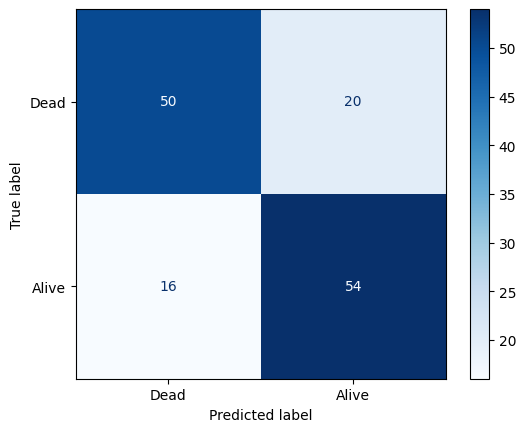

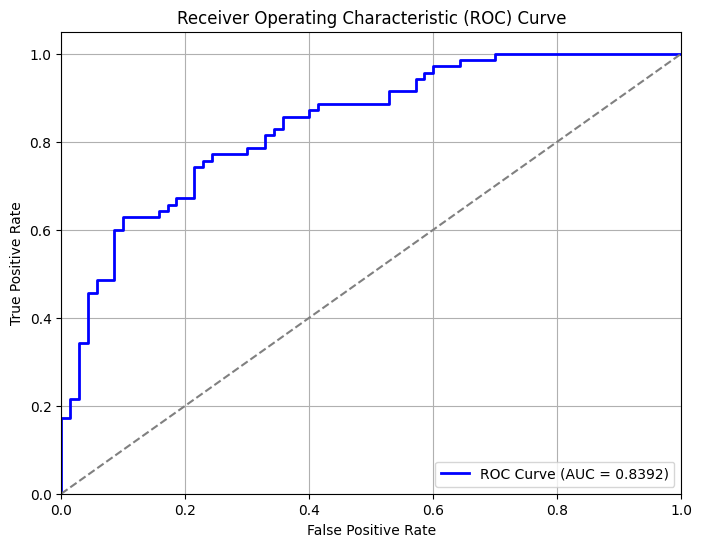

Best Model Results:
Accuracy: 0.7428571428571429
F1 Score: 0.75
Precision: 0.7297297297297297
Recall: 0.7714285714285715
AUC-ROC: 0.8418367346938775


<Figure size 600x600 with 0 Axes>

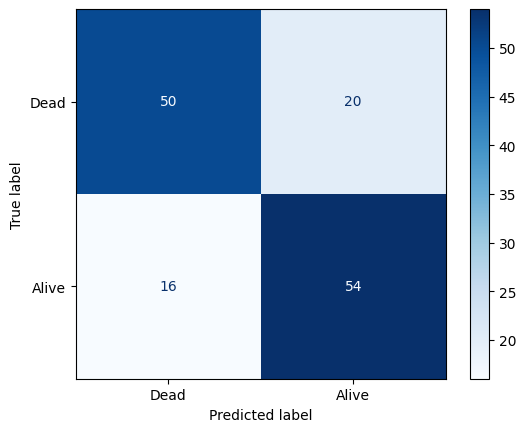

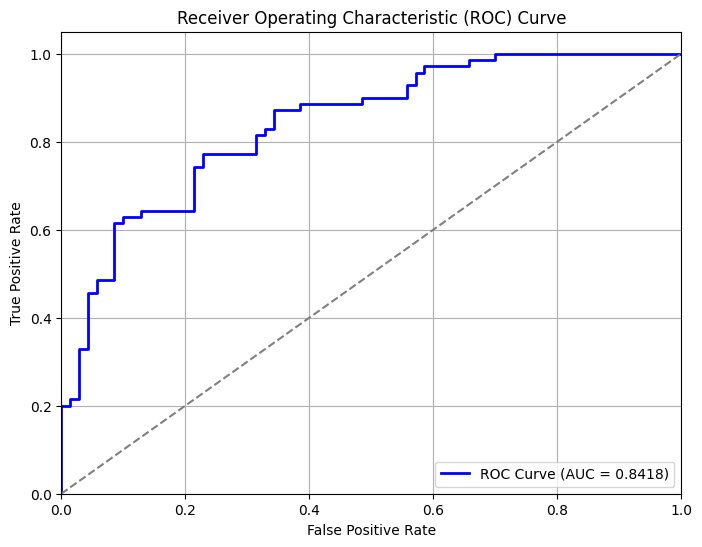

_________________________________________________________________________________________
Running model for cultivar -0.4541709023826783
X_train shape: (606, 6), X_test shape: (140, 6)
Default Model Results:
Accuracy: 0.7785714285714286
F1 Score: 0.7832167832167832
Precision: 0.7671232876712328
Recall: 0.8
AUC-ROC: 0.8355102040816327


<Figure size 600x600 with 0 Axes>

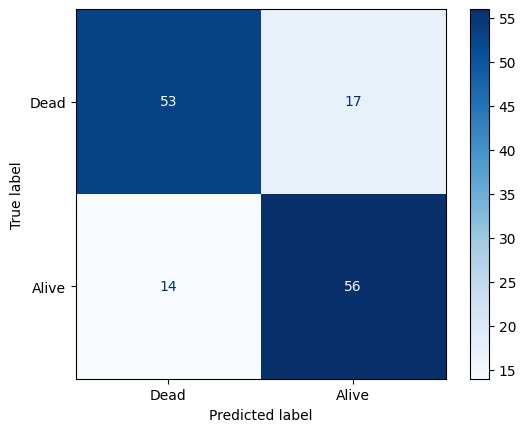

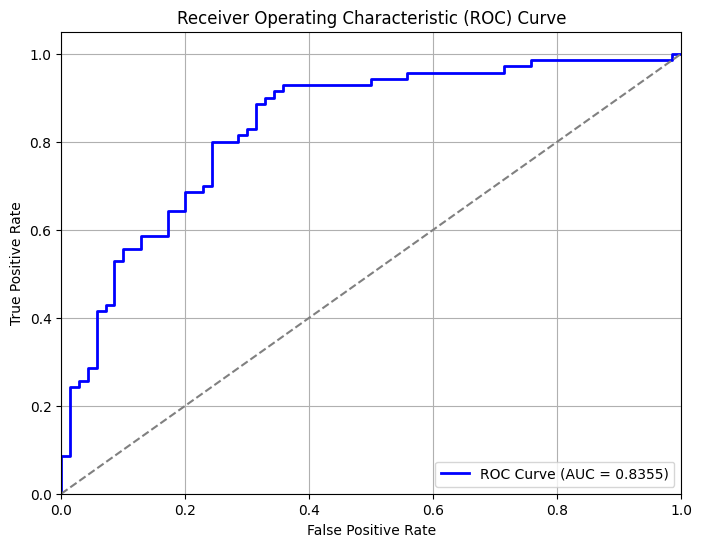

Best Model Results:
Accuracy: 0.7642857142857142
F1 Score: 0.7692307692307693
Precision: 0.7534246575342466
Recall: 0.7857142857142857
AUC-ROC: 0.8342857142857142


<Figure size 600x600 with 0 Axes>

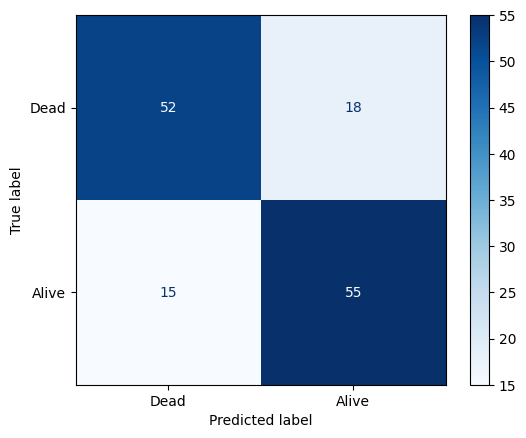

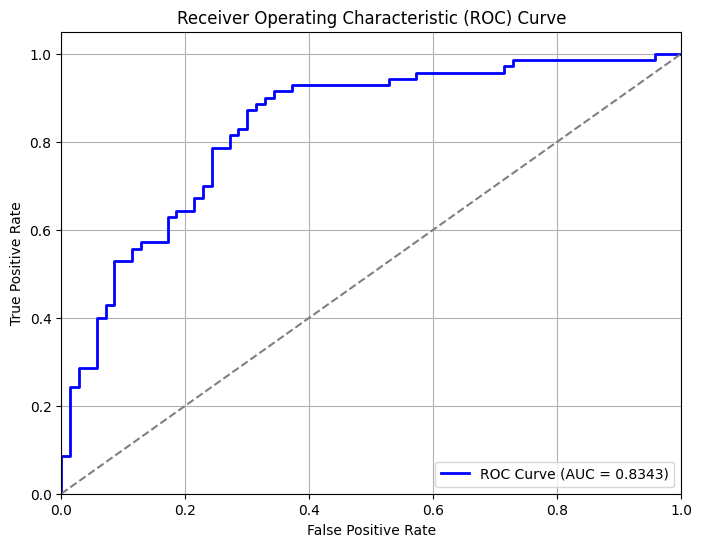

_________________________________________________________________________________________
Running model for cultivar 0.43561012321941656
X_train shape: (553, 6), X_test shape: (140, 6)
Default Model Results:
Accuracy: 0.7857142857142857
F1 Score: 0.8
Precision: 0.75
Recall: 0.8571428571428571
AUC-ROC: 0.8434693877551019


<Figure size 600x600 with 0 Axes>

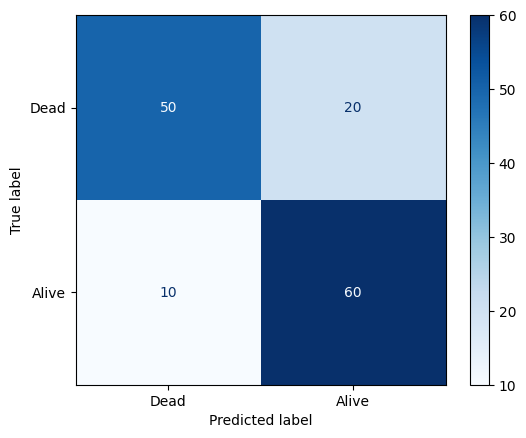

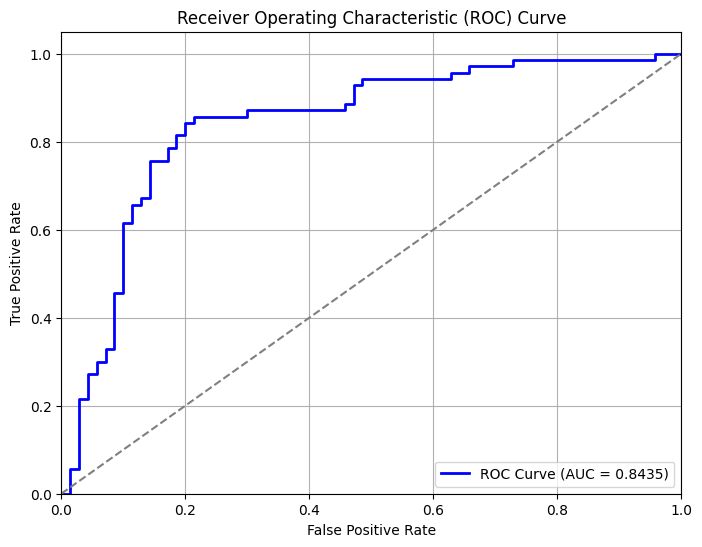

Best Model Results:
Accuracy: 0.7714285714285715
F1 Score: 0.7922077922077922
Precision: 0.7261904761904762
Recall: 0.8714285714285714
AUC-ROC: 0.8491836734693877


<Figure size 600x600 with 0 Axes>

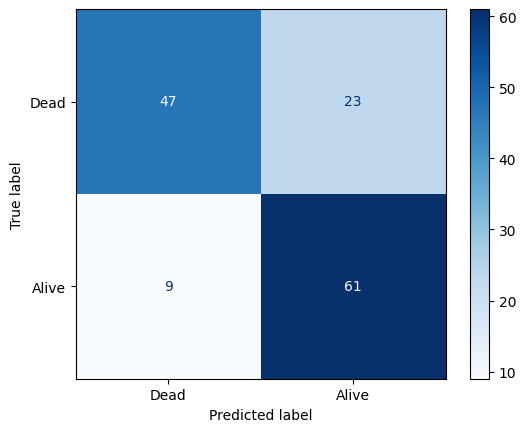

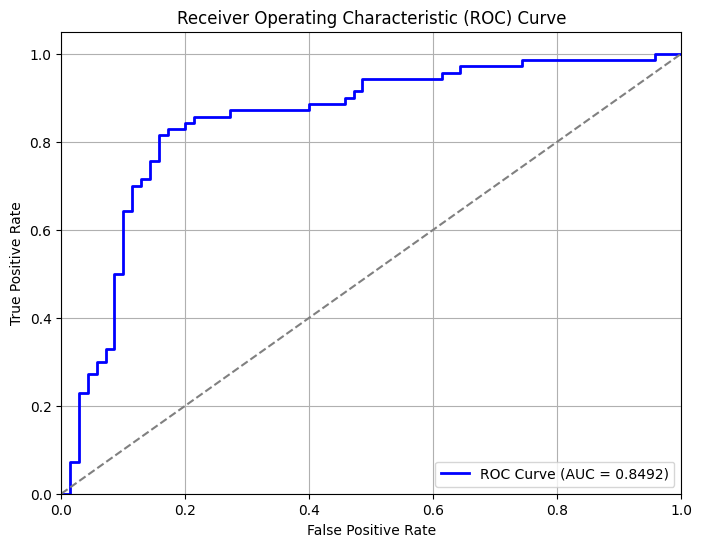

_________________________________________________________________________________________
Running model for cultivar 1.3253911488215115
X_train shape: (612, 6), X_test shape: (140, 6)
Default Model Results:
Accuracy: 0.7928571428571428
F1 Score: 0.7972027972027972
Precision: 0.7808219178082192
Recall: 0.8142857142857143
AUC-ROC: 0.8273469387755102


<Figure size 600x600 with 0 Axes>

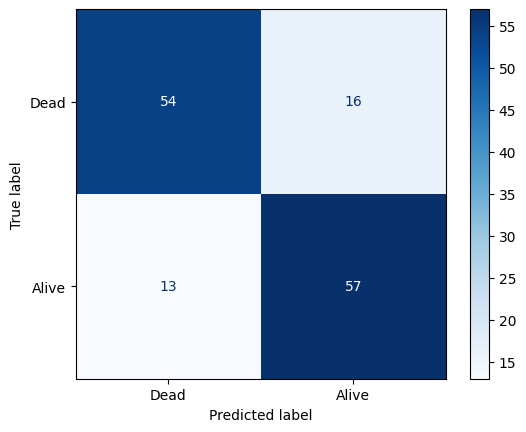

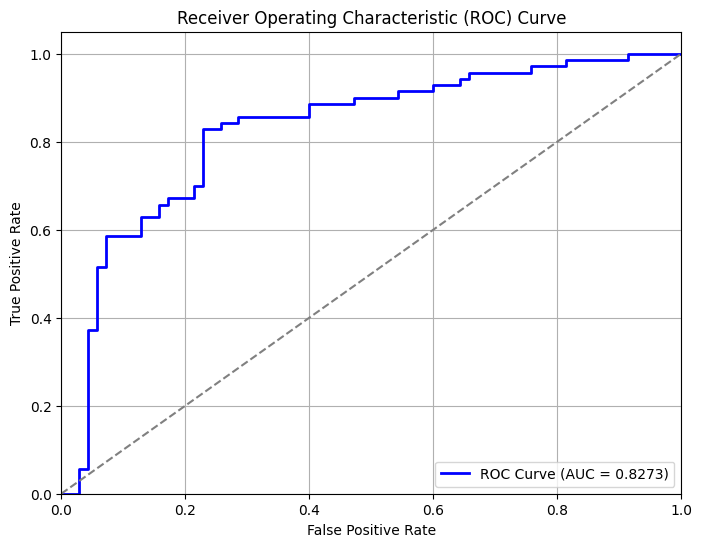

Best Model Results:
Accuracy: 0.7785714285714286
F1 Score: 0.7832167832167832
Precision: 0.7671232876712328
Recall: 0.8
AUC-ROC: 0.8236734693877551


<Figure size 600x600 with 0 Axes>

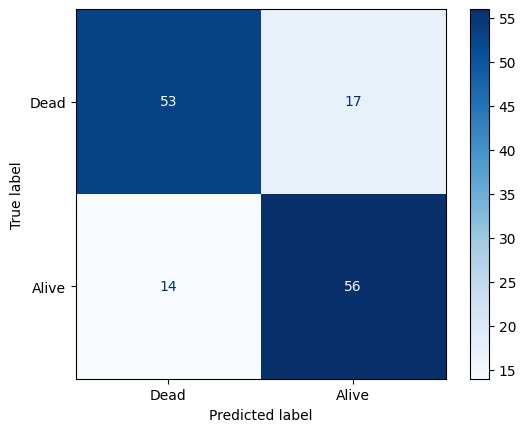

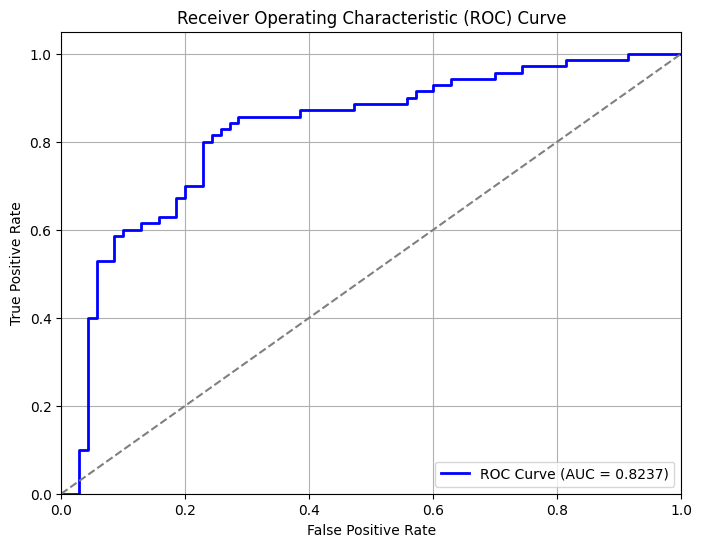

_________________________________________________________________________________________


In [15]:
# split data by different cultivars infos
cultivars = X_train['cultivar'].unique()

for cultivar in cultivars:
    print(f'Running model for cultivar {cultivar}')
    X_train_cultivar = X_train[X_train['cultivar'] == cultivar].drop(columns=['cultivar'])
    y_train_cultivar = y_train[X_train['cultivar'] == cultivar]
    X_test_cultivar = X_test[X_test['cultivar'] == cultivar].drop(columns=['cultivar'])
    y_test_cultivar = y_test[X_test['cultivar'] == cultivar]
    print(f'X_train shape: {X_train_cultivar.shape}, X_test shape: {X_test_cultivar.shape}')

    run_model(X_train_cultivar, y_train_cultivar, X_test_cultivar, y_test_cultivar)
    print('_________________________________________________________________________________________')

In [16]:
# Create a DataFrame for storing ROC data
# roc_df = pd.DataFrame({"FPR": fpr, "TPR": tpr})
# roc_df["Model"] = "Logistic Regression"  # Label for the model
# roc_df["AUC"] = roc_auc  # Store AUC score as a column

# Save to CSV (appending if file exists)
# roc_df.to_csv("roc_comparison.csv", mode='a', index=False, header=not pd.io.common.file_exists("roc_comparison.csv"))